In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv", skipinitialspace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [4]:
import re
REGEX = re.compile("http://mashable.com/([0-9]{4}/[0-9]{2}/[0-9]{2})/([-a-z0-9_]+)/")
def parse_url(url):
    date, slug = REGEX.findall(url)[0]
    date = date.replace("/", "-")
    return date, slug

In [5]:
parsed = [parse_url(url) for url in df["url"]]

In [6]:
dates = [rec[0] for rec in parsed]
slugs = [rec[1] for rec in parsed]

In [7]:
df["date"] = dates
df["slug"] = slugs

In [8]:
df = df.drop("url", axis=1)

In [9]:
weekdays = df[[
    "weekday_is_monday",
    "weekday_is_tuesday",
    "weekday_is_wednesday",
    "weekday_is_thursday",
    "weekday_is_friday",
    "weekday_is_saturday",
    "weekday_is_sunday",
]].values
df["weekday"] = weekdays.argmax(axis=1)
df = df.drop([
    "weekday_is_monday",
    "weekday_is_tuesday",
    "weekday_is_wednesday",
    "weekday_is_thursday",
    "weekday_is_friday",
    "weekday_is_saturday",
    "weekday_is_sunday",
], axis=1)

In [10]:
data_channels = df[[
    "data_channel_is_lifestyle",
    "data_channel_is_entertainment",
    "data_channel_is_bus",
    "data_channel_is_socmed",
    "data_channel_is_tech",
    "data_channel_is_world",
]].values
others = (data_channels.sum(axis=1) == 0)
all_data_channels = np.array(["Lifestyle", "Entertainment", "Business", "Social media", "Technology", "World"])
data_channels = all_data_channels[data_channels.argmax(axis=1)]
data_channels[others] = "Other"
df["data_channel"] = data_channels
df = df.drop([
    "data_channel_is_lifestyle",
    "data_channel_is_entertainment",
    "data_channel_is_bus",
    "data_channel_is_socmed",
    "data_channel_is_tech",
    "data_channel_is_world",
], axis=1)

In [11]:
number_cols = [col for col in df.columns if col.startswith("num_")]
renaming = {col: "n" + col[3:] for col in number_cols}
renaming["self_reference_avg_sharess"] = "self_reference_avg_shares"
renaming["shares"] = "n_shares"
df = df.rename(columns=renaming)

In [12]:
df

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,n_hrefs,n_self_hrefs,n_imgs,n_videos,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,n_shares,date,slug,weekday,data_channel
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2013-01-07,amazon-instant-video-browser,0,Entertainment
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2013-01-07,ap-samsung-sponsored-tweets,0,Business
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2013-01-07,apple-40-billion-app-downloads,0,Business
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2013-01-07,astronaut-notre-dame-bcs,0,Entertainment
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2013-01-07,att-u-verse-apps,0,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,2014-12-27,samsung-app-autism,2,Technology
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,2014-12-27,seth-rogen-james-franco-will-live-tweet-the-in...,2,Social media
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,2014-12-27,son-pays-off-mortgage,2,Other
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,2014-12-27,ukraine-blasts,2,World


In [13]:
columns = list(df.columns)
columns = ["date", "weekday", "data_channel", "slug"] + columns[:-4]
columns

['date',
 'weekday',
 'data_channel',
 'slug',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'n_hrefs',
 'n_self_hrefs',
 'n_imgs',
 'n_videos',
 'average_token_length',
 'n_keywords',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_shares',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'n_share

In [14]:
df[columns]

,date,weekday,data_channel,slug,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,n_shares
0,2013-01-07,0,Entertainment,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,2013-01-07,0,Business,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,2013-01-07,0,Business,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,2013-01-07,0,Entertainment,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,2013-01-07,0,Technology,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,2014-12-27,2,Technology,samsung-app-autism,8.0,11.0,346.0,0.529052,1.0,0.684783,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,2014-12-27,2,Social media,seth-rogen-james-franco-will-live-tweet-the-in...,8.0,12.0,328.0,0.696296,1.0,0.885057,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,2014-12-27,2,Other,son-pays-off-mortgage,8.0,10.0,442.0,0.516355,1.0,0.644128,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,2014-12-27,2,World,ukraine-blasts,8.0,6.0,682.0,0.539493,1.0,0.692661,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [15]:
df["n_shares_percentile"] = df["n_shares"].rank() / len(df)

In [16]:
columns.remove("n_shares")
columns.append("n_shares_percentile")

Text(0, 0.5, 'n_shares_percentile')

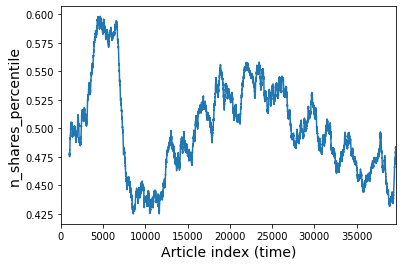

In [17]:
df["n_shares_percentile"].rolling(1000).mean().plot()
plt.xlabel("Article index (time)", fontsize=14)
plt.ylabel("n_shares_percentile", fontsize=14)

In [18]:
df[columns].to_csv("online_news_popularity_for_course.csv", index=False)

In [19]:
!head -n 2 online_news_popularity_for_course.csv

date,weekday,data_channel,slug,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,n_hrefs,n_self_hrefs,n_imgs,n_videos,average_token_length,n_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,n_shares_percentile
2013-01-07,0,Entertainment,amazon-instant-video-browser,731.0,12.0,219.0,0.663594466988,0.9999999923080001,0.8153846091120001,4.0,2.0,1.0,0.0,4.6803652968,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.